# Multiple linear regression

This exercise is useful to see:
- multiple linear regression
- scatterplot matrix
- correlation matrix
- collinearity problem
- the residuals, the studentized residuals and the leverage points
- interaction effects
- non-linear transformations of the predictors

Import all the packages that we need.

In [2]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.outliers_influence import variance_inflation_factor

Read the data from Auto.csv and remove all rows, that are not complete.

In [3]:
auto_df = pd.read_csv('Data/Auto.csv', na_values='?')
auto_df = auto_df.dropna()
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


a) Produce a scatterplot matrix which includes all the variables in the dataset

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

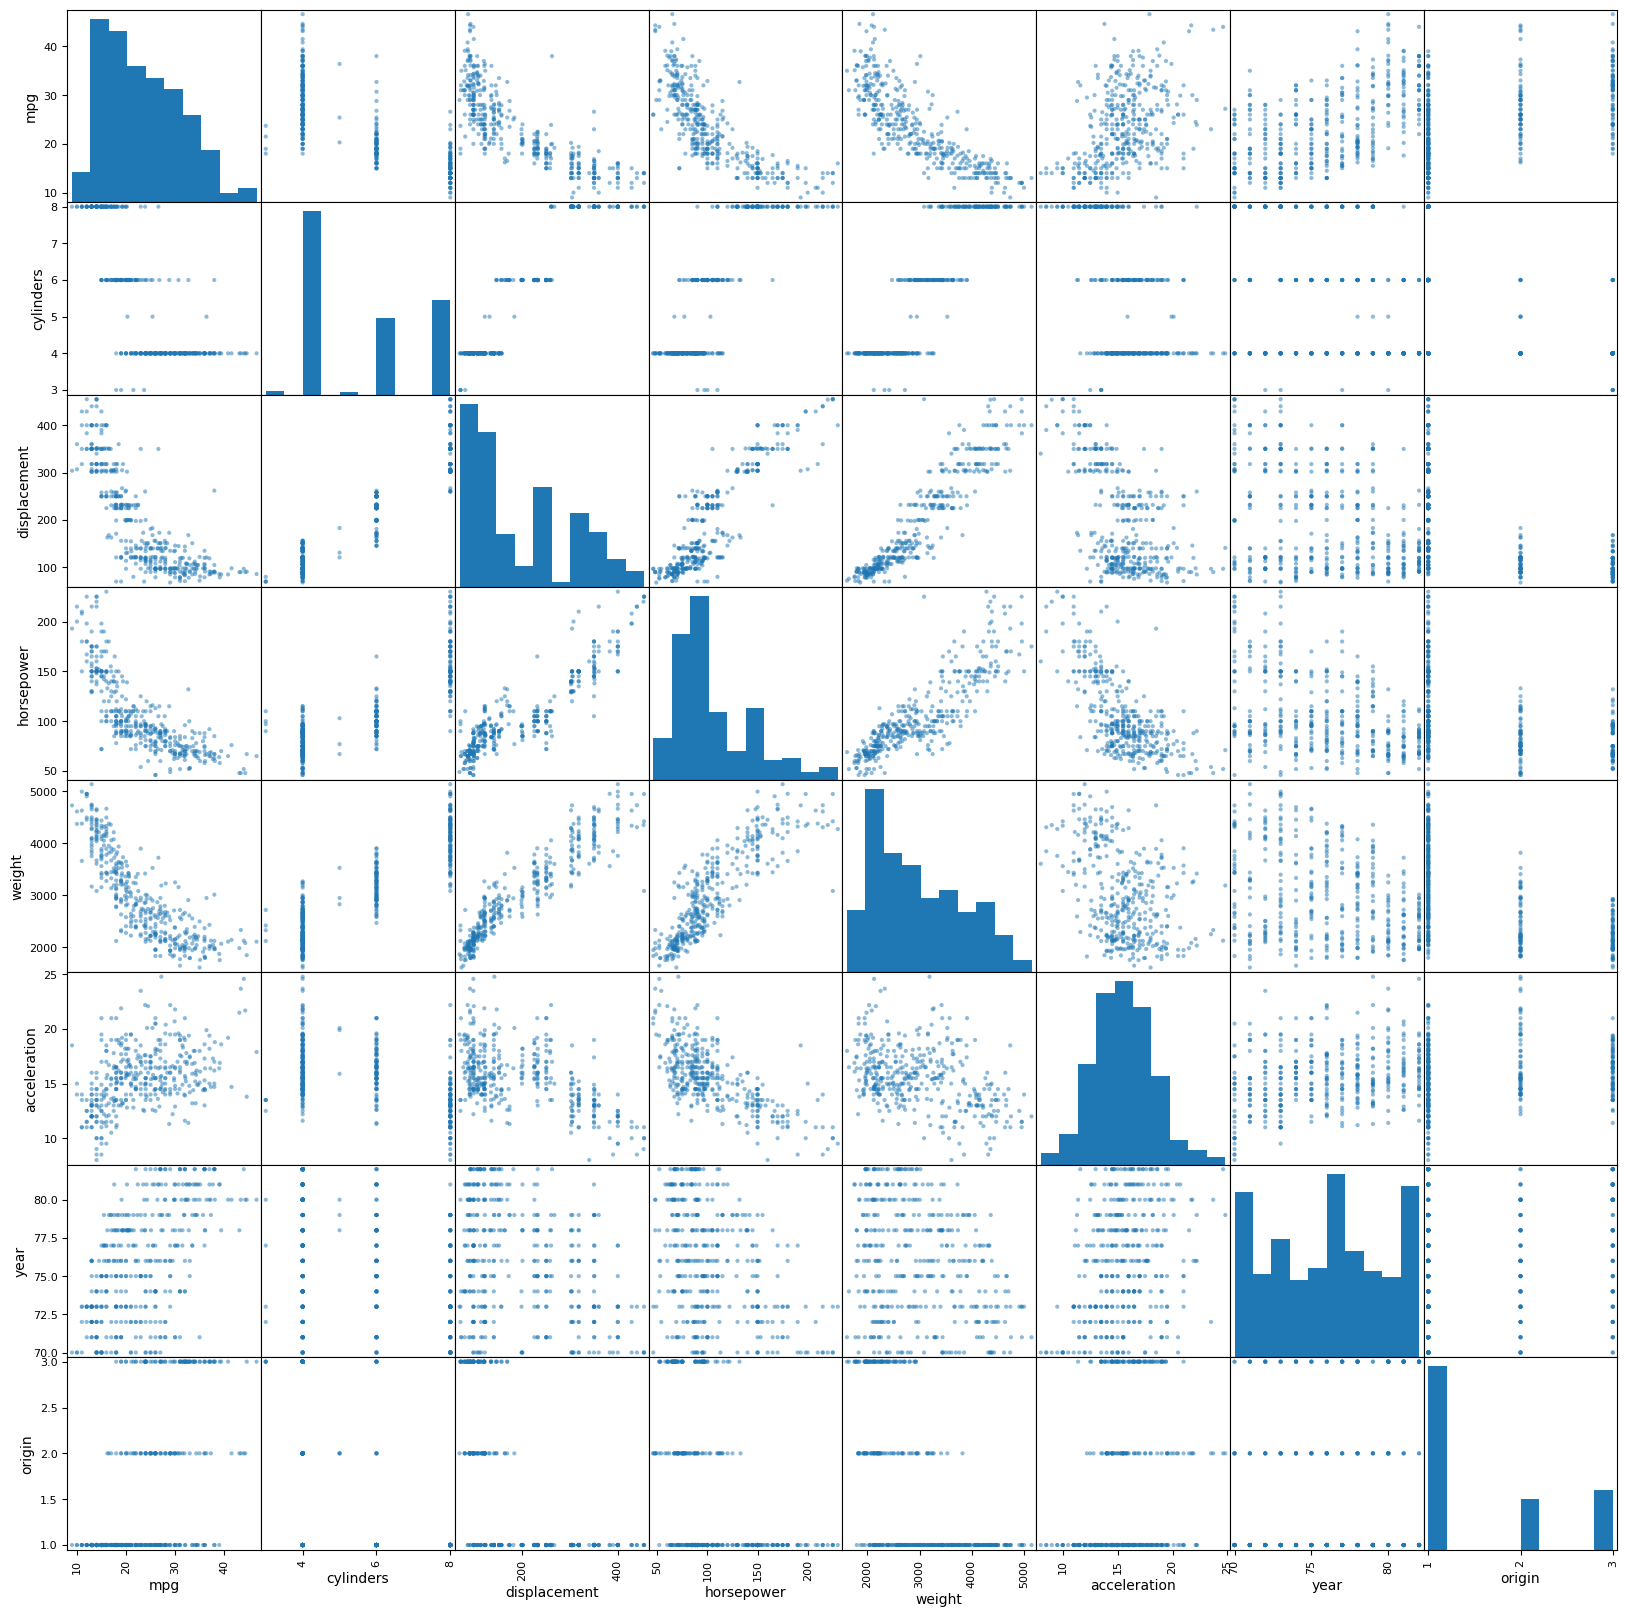

In [4]:

scatter_matrix(auto_df, alpha=0.5, figsize=(20,20))

b) Compute the matrix of correlations between the variables. 

In [5]:
corr = auto_df.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


c) Perform a multiple linear regression with mpg as the response and all other variables (except 'name') as the predictors. Print the results and comment on outputs.

In [6]:
X = sm.add_constant(auto_df.iloc[:,1:-1]) # add all values except mpg and names
y = auto_df.mpg

model = sm.OLS(y,X)
estimate = model.fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          2.04e-139
Time:                        22:52:44   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

d) Compute the variance inflation factors and comment the output.

In [7]:
VIFs = [(predictor, variance_inflation_factor(X.values, _)) for _, predictor in enumerate(list(X))]
for tup in VIFs:
    print('{:20}'.format(tup[0]), '{:.3f}'.format(tup[1]))

const                763.558
cylinders            10.738
displacement         21.837
horsepower           9.944
weight               10.831
acceleration         2.626
year                 1.245
origin               1.772


VIF = 1 -> Absence of collinearity;
VIF > 5 -> Multi-Collinearity
VIF > 10 -> Strong Multi-Collinearity

e) Produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plot suggests any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

Text(0, 0.5, 'studentized_residuals')

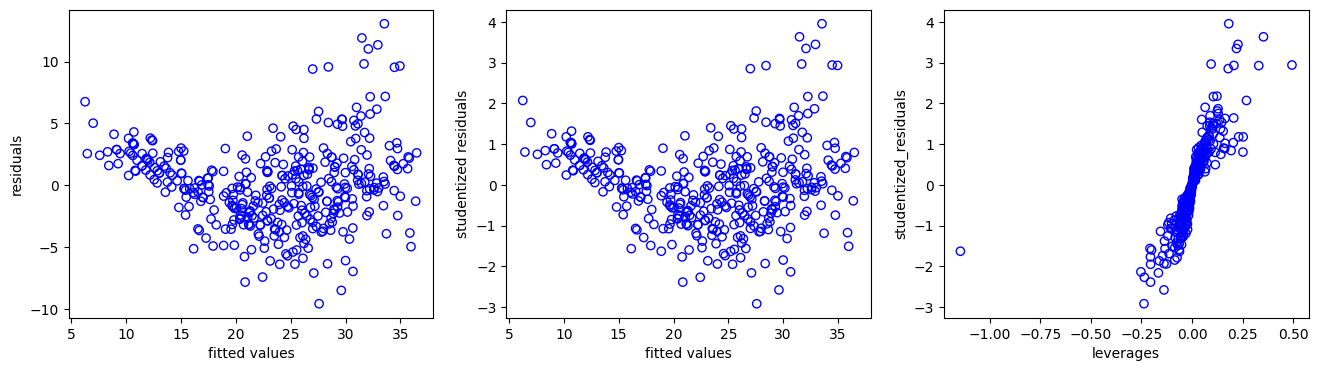

In [8]:
fitted_values = estimate.fittedvalues
residuals = estimate.resid.values
studentized_residuals = OLSInfluence(estimate).resid_studentized_internal
leverages = OLSInfluence(estimate).influence

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,4))
ax1.scatter(fitted_values, residuals, facecolor='none', edgecolor='b')
ax1.set_xlabel('fitted values')
ax1.set_ylabel('residuals')

ax2.scatter(fitted_values, studentized_residuals, facecolor='none', edgecolor='b')
ax2.set_xlabel('fitted values')
ax2.set_ylabel('studentized residuals')

ax3.scatter(leverages, studentized_residuals, facecolor='none', edgecolor='b')
ax3.set_xlabel('leverages')
ax3.set_ylabel('studentized_residuals')

Residuals over fitted values shows a heavy U-shaped graph. This indicates a poor fit for a simple linear regression in the higher fitted values.

Studentized residuals over fitted values shows a U-shaped graph and heavy outliers with a >3 studentized residual value. This indicates an underfit.

Studentized residuals over leverages shows many values for leverages over (p+1)/n = (8+1)/392 = 0.02 here. This indicates a poor fit especially for outliers (duh) -> Better to use some quadratic function for fitting.

f) Fit linear regression models with interaction effects. Do any interactions appear to be statistically significant? Use the example:
$\text{mgp} = \beta_0 + \beta_1\cdot\text{weight} + \beta_2\cdot\text{year} + \beta_3\cdot (\text{weight}\cdot \text{year})$ 

In [9]:
auto_df['weight*year'] = auto_df.weight*auto_df.year
X_interaction = sm.add_constant(auto_df[['weight', 'year', 'weight*year']])
y = auto_df.mpg

model = sm.OLS(y,X_interaction)
estimate = model.fit()
print(estimate.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     649.3
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          8.06e-151
Time:                        22:52:45   Log-Likelihood:                -1009.3
No. Observations:                 392   AIC:                             2027.
Df Residuals:                     388   BIC:                             2043.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -110.4519     12.947     -8.531      

g) Try a few different transformation of the variables, such as:

i) Add a $\text{weight}^2$ variable variable to the model of task f).

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     577.4
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          1.21e-161
Time:                        22:52:45   Log-Likelihood:                -980.70
No. Observations:                 392   AIC:                             1971.
Df Residuals:                     387   BIC:                             1991.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -53.4414     14.093     -3.792      

Text(0, 0.5, 'studentized_residuals')

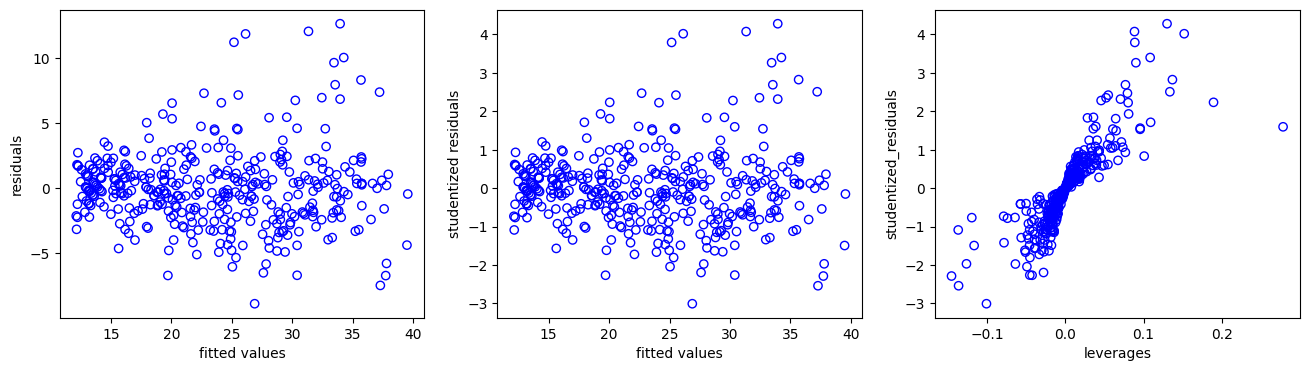

In [10]:
auto_df['weight^2'] = auto_df.weight**2
X_interaction = sm.add_constant(auto_df[['weight', 'weight^2', 'year', 'weight*year']])
y = auto_df.mpg

model = sm.OLS(y,X_interaction)
estimate = model.fit()
print(estimate.summary())

# Obtain the residuals, studentized residuals and the leverages
fitted_values = estimate.fittedvalues
residuals = estimate.resid.values
studentized_residuals = OLSInfluence(estimate).resid_studentized_internal
leverages = OLSInfluence(estimate).influence

# Plot
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,4))
ax1.scatter(fitted_values, residuals, facecolor='none', edgecolor='b')
ax1.set_xlabel('fitted values')
ax1.set_ylabel('residuals')

# Studentized Residuals
ax2.scatter(fitted_values, studentized_residuals, facecolor='none', edgecolor='b')
ax2.set_xlabel('fitted values')
ax2.set_ylabel('studentized residuals')

# Leverages
ax3.scatter(leverages, studentized_residuals, facecolor='none', edgecolor='b')
ax3.set_xlabel('leverages')
ax3.set_ylabel('studentized_residuals')

ii) Add a $\text{weight}^{\frac{1}{2}}$ variable to the model of task f).

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     730.8
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          3.39e-159
Time:                        22:52:45   Log-Likelihood:                -989.84
No. Observations:                 392   AIC:                             1988.
Df Residuals:                     388   BIC:                             2004.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.7659      8.698      7.791      0.0

Text(0, 0.5, 'studentized_residuals')

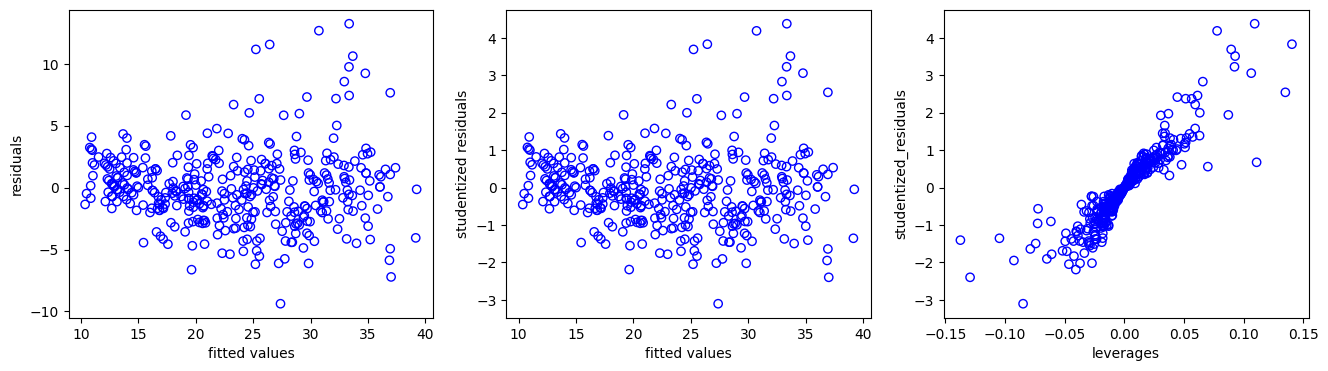

In [11]:
auto_df['weight^0.5'] = auto_df.weight**0.5
X_interaction = sm.add_constant(auto_df[['weight', 'year', 'weight^0.5']])

model = sm.OLS(y,X_interaction)
estimate = model.fit()
print(estimate.summary())

fitted_values = estimate.fittedvalues
residuals = estimate.resid.values
studentized_residuals = OLSInfluence(estimate).resid_studentized_internal
leverages = OLSInfluence(estimate).influence

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,4))
ax1.scatter(fitted_values, residuals, facecolor='none', edgecolor='b')
ax1.set_xlabel('fitted values')
ax1.set_ylabel('residuals')

ax2.scatter(fitted_values, studentized_residuals, facecolor='none', edgecolor='b')
ax2.set_xlabel('fitted values')
ax2.set_ylabel('studentized residuals')

ax3.scatter(leverages, studentized_residuals, facecolor='none', edgecolor='b')
ax3.set_xlabel('leverages')
ax3.set_ylabel('studentized_residuals')

iii) Add a $\log(\text{weight})$ variable to the model of task f).

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     727.0
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          8.03e-159
Time:                        22:52:45   Log-Likelihood:                -990.71
No. Observations:                 392   AIC:                             1989.
Df Residuals:                     388   BIC:                             2005.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         284.2873     29.393      9.672      

Text(0, 0.5, 'studentized_residuals')

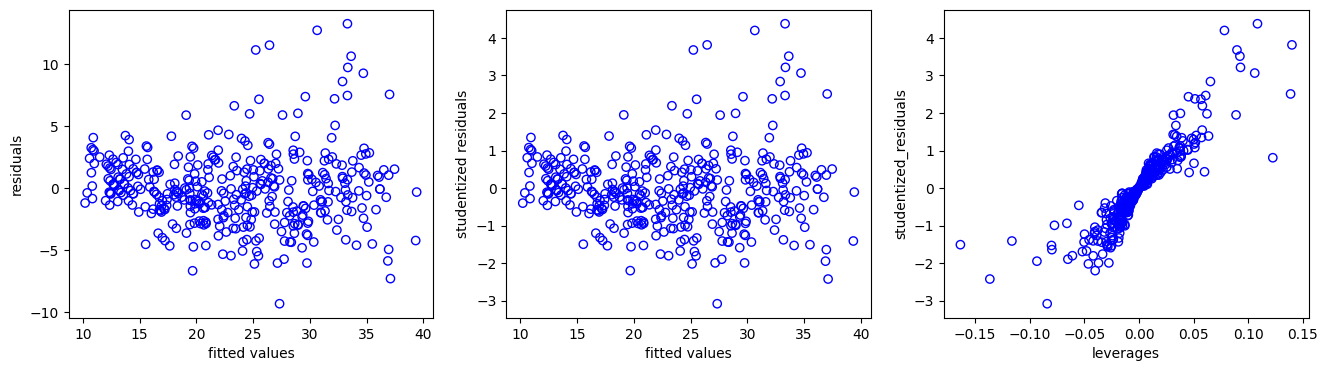

In [12]:
auto_df['log(weight)'] = np.log(auto_df.weight)
X_interaction = sm.add_constant(auto_df[['weight', 'year', 'log(weight)']])

model = sm.OLS(y,X_interaction)
estimate = model.fit()
print(estimate.summary())

fitted_values = estimate.fittedvalues
residuals = estimate.resid.values
studentized_residuals = OLSInfluence(estimate).resid_studentized_internal
leverages = OLSInfluence(estimate).influence

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,4))
ax1.scatter(fitted_values, residuals, facecolor='none', edgecolor='b')
ax1.set_xlabel('fitted values')
ax1.set_ylabel('residuals')

ax2.scatter(fitted_values, studentized_residuals, facecolor='none', edgecolor='b')
ax2.set_xlabel('fitted values')
ax2.set_ylabel('studentized residuals')

ax3.scatter(leverages, studentized_residuals, facecolor='none', edgecolor='b')
ax3.set_xlabel('leverages')
ax3.set_ylabel('studentized_residuals')